In [1]:
using Pkg
Pkg.activate("..")
using QTool
# load ODE backend
load_diff_eq()

┌ Info: Recompiling stale cache file /Users/huochen/.julia/compiled/v1.1/QTool/KVjiT.ji for QTool [e8834dde-9baa-11e8-0b86-8102e36a51ba]
└ @ Base loading.jl:1184


## Defining Ohmic bath

All the units of the following block is in lab frame.

In [2]:
# interaction strength
η = 1e-4
# cutoff frequency in terms of GHz
fc = 4
# temperature in mK
T = 16

bath = Ohmic(η, fc, T)

Ohmic bath instance:
η (unitless): 0.0001
ωc (GHz): 4.0
T (mK): 16.0

## Construct interpolation of bath spectral density
Pre-calculate the bath spectral density $\gamma(\omega)$ and $S(\omega)$ within a user defined range to speed up the ME calculation.

In [5]:
ω_span = range(-2.0,2.0,length=200) # user defined range for interpolation
γ_itp, S_itp = interpolate_spectral_density(ω_span, bath);

## Defining System

Define function of Hamiltonian, initial state and system bath interaction term. Currently the general interface only support one system-bath interaction term.

In [23]:
# define Hamiltonian
hfun(s) = -0.5 * (1-s)*σx - 0.5 * s*σz
# define initial state
u0 = PauliVec[1][1] * PauliVec[1][1]'
# define interaction term
inter_op = σz;

## Solving the equation in Schrodinger picture

In [26]:
sol = solve_adiabatic_me(hfun, u0, 10*sqrt(2), σz, γ_itp, S_itp)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 28-element Array{Float64,1}:
 0.0                 
 0.019800003248353303
 0.03570581696953718 
 0.05770332292748364 
 0.08003548489775998 
 0.10571684479865365 
 0.13283251963979753 
 0.16218833344862596 
 0.19317885760738995 
 0.22604140331363073 
 0.26066146132615564 
 0.29720265822907144 
 0.33572412858089956 
 ⋮                   
 0.5078902711350258  
 0.5544498039685497  
 0.6022776355920485  
 0.6510848225636958  
 0.7000621874277063  
 0.7483312101454475  
 0.795323972385359   
 0.8405856166709987  
 0.8838296293982324  
 0.925008224890506   
 0.9642566606162581  
 1.0                 
u: 28-element Array{Array{Complex{Float64},2},1}:
 [0.5+0.0im 0.5+0.0im; 0.5+0.0im 0.5+0.0im]                                                      
 [0.500126-5.64676e-18im 0.499721+0.00137656im; 0.499721-0.00137656im 0.499874+5.68041e-18im]    
 [0.500726-7.36511e-18im 0.49948+0.00441327im; 0.49948-0.00441327im 0.49927

## Results
In the following section, we plot the instantanenous ground state population.

In [34]:
using Plots
pyplot();

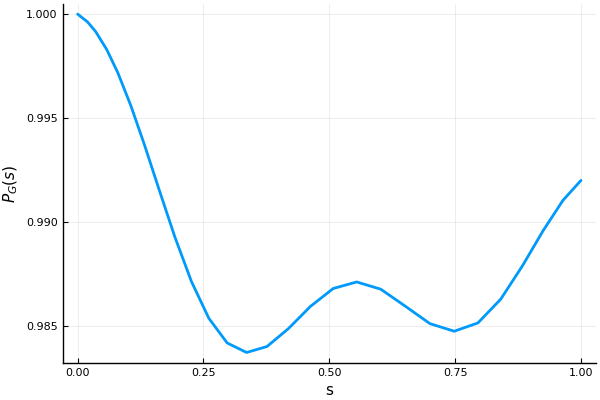

In [33]:
pop = inst_population(sol.t, sol.u, hfun)
y = [x[1] for x in pop]
plot(sol.t, y, linewidth=2, legend=false)
xlabel!("s")
ylabel!("\$P_G(s)\$")